<a href="https://colab.research.google.com/github/Rusulabbas/219-FINAL/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#Uplading the dataset
url = 'https://raw.githubusercontent.com/Rusulabbas/219-FINAL/main/ObesityDataSet.csv'
df = pd.read_csv(url) #sotirng it into a df
df = df.drop(['Age'], axis=1) #removing the Age column
info = df.info() #looking at the column types
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Height                          2111 non-null   float64
 2   Weight                          2111 non-null   float64
 3   family_history_with_overweight  2111 non-null   object 
 4   FAVC                            2111 non-null   object 
 5   FCVC                            2111 non-null   float64
 6   NCP                             2111 non-null   float64
 7   CAEC                            2111 non-null   object 
 8   SMOKE                           2111 non-null   object 
 9   CH2O                            2111 non-null   float64
 10  SCC                             2111 non-null   object 
 11  FAF                             2111 non-null   float64
 12  TUE                             21

In [3]:
#Defining a column transformer using make_column_transformer
scaled = make_column_transformer(
    (StandardScaler(), ['Height','Weight', 'FCVC', 'NCP','CH2O', 'FAF', 'TUE']), #Scaling numerical features using StandardScaler
    (OneHotEncoder(handle_unknown='ignore'), ['Gender', 'family_history_with_overweight' ,'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad'])#Encoding categorical features using OneHotEncoder
)
df_array = scaled.fit_transform(df) #storing the transformed data in 'df_array'
df_array

array([[-0.87558934, -0.86255819, -0.7850187 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.94759928, -1.16807699,  1.08834176, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.05402854, -0.36609013, -0.7850187 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.54167211,  1.79886776,  1.08834176, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.40492652,  1.78577968,  1.08834176, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.39834438,  1.7905916 ,  1.08834176, ...,  1.        ,
         0.        ,  0.        ]])

In [4]:
data = scaled.transform(df)
pca = PCA(n_components=2) #creating a pca with 2 principal components
pca.fit(data) #fitting pca to the trasformed data
data_pca = pca.transform(data) #transforming the data to the new pca space
data_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2']) #creating a DataFrame from the transformed pca data with column names PC1 and PC2
data_pca.head(10) #Displaying the first 10 rows of the DataFrame

,PC1,PC2
0,1.572311,0.320296
1,0.739732,0.064238
2,-0.800498,1.880353
3,-0.972983,0.335226
4,0.447716,-0.311315
5,1.413837,0.217437
6,1.815397,-1.085795
7,0.589997,1.872304
8,-0.412963,0.442189
9,0.132260,1.325471


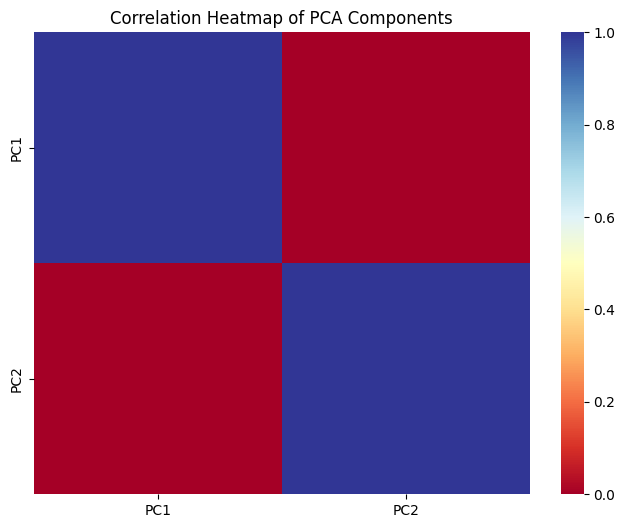

In [5]:
plt.figure(figsize=(8, 6))#Specifing the size of the  figure
# Creating a heatmap of the correlation matrix of the PCA components DataFrame 'data_pca'
# cmap='RdYlBu' sets the color map for the heatmap
sns.heatmap(data_pca.corr(), cmap='RdYlBu')
plt.title('Correlation Heatmap of PCA Components') #title
plt.show()

In the heatmap, the blue squares on the diagonal, showing 'PC1' with 'PC1' and 'PC2' with 'PC2', suggest a perfect positive correlation of 1, which normal in a correlation matrix because each variable is perfectly correlated with itself. whereas, the red square intersecting 'PC1' and 'PC2' shows little to no correlation between the two principal components, confirming the effectiveness of PCA.

In [6]:
# Initializing the KPrototypes algorithm for clustering
# n_clusters: This sets the number of groups (clusters) that we want the algorithm to find.
# verbose: This controls how much information the algorithm prints during its process. Setting it to 2 means we'll see more details.
# max_iter: This sets the maximum number of times the algorithm will adjust the clusters to find the best fit.
kproto = KPrototypes(n_clusters=3, verbose =2, max_iter=20)
# Fitting the KPrototypes model to our data
# In our data, we have both numerical and categorical information.
cluster = kproto.fit_predict(df_array, categorical=[0, 4,5,6,7,8,9,10,11,12,13,14,15,16])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 435, ncost: 9159.008581422713
Run: 1, iteration: 2/20, moves: 358, ncost: 8650.031997428885
Run: 1, iteration: 3/20, moves: 163, ncost: 8462.860037049677
Run: 1, iteration: 4/20, moves: 13, ncost: 8462.293285397425
Run: 1, iteration: 5/20, moves: 1, ncost: 8462.265872686987
Run: 1, iteration: 6/20, moves: 0, ncost: 8462.265872686987
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 639, ncost: 8958.728254085063
Run: 2, iteration: 2/20, moves: 438, ncost: 8508.87486629179
Run: 2, iteration: 3/20, moves: 104, ncost: 8463.504679401804
Run: 2, iteration: 4/20, moves: 24, ncost: 8462.299632989938
Run: 2, iteration: 5/20, moves: 2, ncost: 8462.265872686987
Run: 2, iteration: 6/20, moves: 0, ncost: 8462.265872686987
Init: initializing centroids
In

In [7]:
# Printing the cluster centroids found by the KPrototypes algorithm
# Cluster centroids are the representative points of each cluster.
# They are the average values of the features within each cluster
print(kproto.cluster_centroids_)

[[-4.91887264e-01 -3.13337414e-01  5.11912010e-01  9.81064022e-01
   1.89359784e-02  9.32371506e-01  6.76284941e-02  0.00000000e+00
   4.86925158e-02  5.65374211e-01  3.85933273e-01  2.62398557e-01
   5.41027953e-03  8.11541930e-03  6.84400361e-01  3.96753832e-02
   1.98376916e-01  2.11902615e-01  1.77637511e-01  4.50856628e-02
   0.00000000e+00  1.81244364e-01  1.85752931e-01 -1.79813950e-02
  -1.30732640e-02 -1.18803911e+00 -1.08062463e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00]
 [-3.94487685e-01 -1.22507661e-01 -1.81763881e+00  9.81042654e-01
   1.89573460e-02  9.50236967e-01  4.97630332e-02  2.36966825e-03
   3.79146919e-02  5.26066351e-01  4.33649289e-01  2.08530806e-01
   0.00000000e+00  4.73933649e-03  7.60663507e-01  2.60663507e-02
   1.23222749e-01  1.23222749e-01  2.60663507e-01  8.53080569e-02
   0.00000000e+00  2.10900474e-01  1.96682464e-01 -8.7558

In [8]:
# Creating an empty list to store cluster assignments
cluster_dict = []
#Iterating through each cluster assignment obtained from the clustering algorithm
for c in cluster:
  cluster_dict.append(c)
cluster_dict

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,


In [9]:
# Add the cluster column from df to data_pca

df['cluster'] = cluster_dict
data_pca['cluster'] = df['cluster']
# Creatng an interactive scatter plot of PC1 vs PC2
fig = px.scatter(data_pca, x='PC1', y='PC2', color='cluster',
                 title='Interactive Scatter Plot: PC1 vs PC2',
                 labels={'PC1': 'Principal Component 1 (PC1)', 'PC2': 'Principal Component 2 (PC2)'},
                 hover_data={'PC1': True, 'PC2': True, 'cluster': False})
fig.show()


The interactive scatter plot visualizes the data points in terms of their first two main components, PC1 and PC2, with each point's location showing its value for these components. Hovering over the points shows their specific PC1 and PC2 values, but not their cluster. This graphic helps with analyzing the distribution and separation of data inside the PCA-reduced feature space, providing insights into the clustering achieved by the KPrototypes method.

In [10]:
# Filtering the DataFrame 'df' to include only rows where the value in the 'cluster' column is equal to 0
# This means we're selecting data points that belong to cluster 0
df[df['cluster']==0].head(10)

,Gender,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,cluster
0,Female,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,0
1,Female,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,0
2,Male,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0
3,Male,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,0
5,Male,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight,0
6,Female,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight,0
7,Male,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,0
8,Male,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight,0
9,Male,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight,0
11,Female,1.72,80.0,yes,yes,2.0,3.0,Frequently,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Overweight_Level_II,0


In [11]:
# Filtering the DataFrame 'df' to include only rows where the value in the 'cluster' column is equal to 1
# This means we're selecting data points that belong to cluster 1
df[df['cluster']==1].head(10)

,Gender,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,cluster
4,Male,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,1
14,Male,1.77,60.0,yes,yes,3.0,1.0,Sometimes,no,1.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight,1
16,Male,1.93,102.0,yes,yes,2.0,1.0,Sometimes,no,1.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,1
17,Female,1.53,78.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,no,Automobile,Obesity_Type_I,1
19,Female,1.65,70.0,yes,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I,1
21,Female,1.69,87.0,yes,yes,3.0,1.0,Sometimes,yes,2.0,no,0.0,0.0,no,Automobile,Obesity_Type_I,1
23,Female,1.60,82.0,yes,yes,1.0,1.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Obesity_Type_I,1
26,Male,1.70,65.0,yes,yes,2.0,1.0,Frequently,no,2.0,no,1.0,2.0,Always,Walking,Normal_Weight,1
31,Female,1.58,68.0,yes,no,2.0,1.0,Sometimes,no,1.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,1
33,Male,1.79,90.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,1


In [12]:
# Filtering the DataFrame 'df' to include only rows where the value in the 'cluster' column is equal to 2
# This selects data points that belong to cluster 2
df[df['cluster']==2].head(10)

,Gender,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,cluster
10,Male,1.85,105.0,yes,yes,3.0,3.0,Frequently,no,3.0,no,2.0,2.0,Sometimes,Public_Transportation,Obesity_Type_I,2
90,Female,1.63,93.0,no,no,3.0,4.0,Always,no,1.0,no,2.0,0.0,no,Public_Transportation,Obesity_Type_II,2
134,Male,1.77,109.0,yes,yes,3.0,3.0,Sometimes,no,1.0,no,2.0,0.0,Sometimes,Automobile,Obesity_Type_I,2
165,Male,1.92,130.0,yes,no,2.0,3.0,Sometimes,yes,1.0,no,1.0,0.0,Sometimes,Public_Transportation,Obesity_Type_II,2
197,Male,1.75,118.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Bike,Obesity_Type_II,2
202,Female,1.56,102.0,yes,yes,3.0,3.0,Sometimes,yes,1.0,no,0.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III,2
225,Male,1.83,121.0,yes,no,3.0,3.0,Sometimes,no,3.0,no,2.0,0.0,Sometimes,Walking,Obesity_Type_II,2
229,Male,1.75,120.0,yes,no,3.0,3.0,Sometimes,no,3.0,no,0.0,2.0,no,Automobile,Obesity_Type_II,2
305,Male,1.75,120.0,yes,yes,2.0,3.0,Sometimes,yes,2.0,no,2.0,1.0,Sometimes,Public_Transportation,Obesity_Type_II,2
329,Female,1.65,82.0,yes,yes,3.0,3.0,Sometimes,no,1.0,no,0.0,1.0,Sometimes,Public_Transportation,Obesity_Type_I,2
